About Dataset
Context:
This synthetic healthcare dataset has been created to serve as a valuable resource for data science, machine learning, and data analysis enthusiasts. It is designed to mimic real-world healthcare data, enabling users to practice, develop, and showcase their data manipulation and analysis skills in the context of the healthcare industry.

Inspiration:
The inspiration behind this dataset is rooted in the need for practical and diverse healthcare data for educational and research purposes. Healthcare data is often sensitive and subject to privacy regulations, making it challenging to access for learning and experimentation. To address this gap, I have leveraged Python's Faker library to generate a dataset that mirrors the structure and attributes commonly found in healthcare records. By providing this synthetic data, I hope to foster innovation, learning, and knowledge sharing in the healthcare analytics domain.

Dataset Information:
Each column provides specific information about the patient, their admission, and the healthcare services provided, making this dataset suitable for various data analysis and modeling tasks in the healthcare domain. Here's a brief explanation of each column in the dataset -

Name: This column represents the name of the patient associated with the healthcare record.
Age: The age of the patient at the time of admission, expressed in years.
Gender: Indicates the gender of the patient, either "Male" or "Female."
Blood Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).
Medical Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.
Date of Admission: The date on which the patient was admitted to the healthcare facility.
Doctor: The name of the doctor responsible for the patient's care during their admission.
Hospital: Identifies the healthcare facility or hospital where the patient was admitted.
Insurance Provider: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."
Billing Amount: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.
Room Number: The room number where the patient was accommodated during their admission.
Admission Type: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.
Discharge Date: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.
Medication: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."
Test Results: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.
Usage Scenarios:
This dataset can be utilized for a wide range of purposes, including:

Developing and testing healthcare predictive models.
Practicing data cleaning, transformation, and analysis techniques.
Creating data visualizations to gain insights into healthcare trends.
Learning and teaching data science and machine learning concepts in a healthcare context.
You can treat it as a Multi-Class Classification Problem and solve it for Test Results which contains 3 categories(Normal, Abnormal, and Inconclusive).
Acknowledgments:
I acknowledge the importance of healthcare data privacy and security and emphasize that this dataset is entirely synthetic. It does not contain any real patient information or violate any privacy regulations.
I hope that this dataset contributes to the advancement of data science and healthcare analytics and inspires new ideas. Feel free to explore, analyze, and share your findings with the Kaggle community.
Image Credit:
Image by BC Y from Pixabay

GETTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

GETTING THE DATASET READY

In [2]:
DataFrame=pd.read_csv("healthcare_dataset.csv")
print("DataFrame shape : ")
print(DataFrame.shape)
pd.set_option("display.max_columns",DataFrame.shape[-1])
print("DataFrame description .....")
print(DataFrame.info())
print(DataFrame.describe())


DataFrame shape : 
(55500, 15)
DataFrame description .....
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 

CHECKING FOR MISSING AND DUPLICATED VALUES

In [3]:
print("Checking for the missing values : ")
print(DataFrame.isna().sum())
print("Checking for the duplicated values : ")
print(DataFrame.duplicated().sum())
DataFrame=DataFrame.drop_duplicates()
print(DataFrame.shape)

Checking for the missing values : 
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64
Checking for the duplicated values : 
534
(54966, 15)


In [4]:
list_of_objects=list(DataFrame.select_dtypes(include=["object"]).columns)
list_of_objects.remove("Date of Admission")
list_of_objects.remove("Discharge Date")
print(list_of_objects)


['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']


In [5]:
DataFrame["Date of Admission"]=pd.to_datetime(DataFrame["Date of Admission"])
DataFrame["Discharge Date"]=pd.to_datetime(DataFrame["Discharge Date"])

print(DataFrame.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                54966 non-null  object        
 1   Age                 54966 non-null  int64         
 2   Gender              54966 non-null  object        
 3   Blood Type          54966 non-null  object        
 4   Medical Condition   54966 non-null  object        
 5   Date of Admission   54966 non-null  datetime64[ns]
 6   Doctor              54966 non-null  object        
 7   Hospital            54966 non-null  object        
 8   Insurance Provider  54966 non-null  object        
 9   Billing Amount      54966 non-null  float64       
 10  Room Number         54966 non-null  int64         
 11  Admission Type      54966 non-null  object        
 12  Discharge Date      54966 non-null  datetime64[ns]
 13  Medication          54966 non-null  object        


In [6]:
DataFrame["Total_stay"]=(DataFrame["Discharge Date"]-DataFrame["Date of Admission"]).dt.days
DataFrame["Total_stay"].sample(5)


46588    28
29428     8
5775     12
16044    15
17733    26
Name: Total_stay, dtype: int64

In [7]:
DataFrame.drop(columns=["Date of Admission","Discharge Date"],inplace=True)


In [8]:
DataFrame.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Total_stay'],
      dtype='object')

In [9]:
DataFrame.drop(columns=["Doctor"],inplace=True)
print(DataFrame["Hospital"].sample(5))

47688                      Stewart-Garza
9333                       Kaufman-Patel
43461    and Martinez Stevenson, Montoya
54347                         Cox-Miller
7511       Fischer Henderson, and Nguyen
Name: Hospital, dtype: object


In [10]:
DataFrame.drop(columns=["Hospital"],inplace=True)

In [11]:
DataFrame.sample(5)

,Name,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Total_stay
30034,nIcOlE SCHwaRTz,65,Male,O+,Diabetes,Blue Cross,31712.760316,329,Urgent,Lipitor,Normal,22
3987,RiCArdO tuckeR,83,Male,A+,Diabetes,UnitedHealthcare,15633.180261,118,Emergency,Ibuprofen,Normal,6
39211,cLiNtOn scHMiDt,56,Female,O+,Hypertension,Cigna,16601.123482,418,Elective,Lipitor,Abnormal,30
32535,juStIn mILler,48,Female,O-,Cancer,UnitedHealthcare,49989.368578,196,Emergency,Paracetamol,Normal,7
30447,wiLLIAM weLcH,38,Female,O-,Asthma,UnitedHealthcare,31158.352258,167,Urgent,Ibuprofen,Normal,14


In [12]:
list_of_objects=DataFrame.select_dtypes(include=["object"])
for i in list_of_objects:
        print(i)
        print(DataFrame[i].unique())


Name
['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']
Gender
['Male' 'Female']
Blood Type
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Medical Condition
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Insurance Provider
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Admission Type
['Urgent' 'Emergency' 'Elective']
Medication
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']
Test Results
['Normal' 'Inconclusive' 'Abnormal']


In [13]:
from sklearn.preprocessing import LabelEncoder
dictionary_of_encoders={}
for i in list_of_objects:
        encoder=LabelEncoder()
        DataFrame[i]=encoder.fit_transform(DataFrame[i])
        dictionary_of_encoders[i]=list(encoder.classes_)




In [14]:
dictionary_of_encoders

{'Name': ['AARON DuncAn',
  'AARON HicKS',
  'AARON bAldWIN Jr.',
  'AARON hAWkIns',
  'AAROn HaRt',
  'AAROn wiLsON',
  'AARoN FOSTer',
  'AARoN HOPkINs',
  'AARoN grEEnE',
  'AARon OnEal',
  'AARon SmIth',
  'AARon goOdwIn',
  'AARon poPe',
  'AARon smITh',
  'AArON BeNtlEy',
  'AArON GOoDmAN',
  'AArON ROdRIgueZ',
  'AArON RiChaRDsON',
  'AArON rOmEro',
  'AArON sTrICkLanD',
  'AArOn AnderSoN',
  'AArOn CoOK',
  'AArOn DaVIs',
  'AArOn STAnLey',
  'AArOn huFf',
  'AArOn meZa',
  'AAroN MArtiN',
  'AAroN SwEENEY',
  'AAroN bAker',
  'AAron ArCHER',
  'AAron DicKSoN',
  'AAron FisHER',
  'AAron LoPez',
  'AAron RoWE',
  'AAron SMItH',
  'AAron WIlkinS',
  'AAron fuller',
  'AAron reEd',
  'ABIGAIL pARKeR',
  'ABIGAIl AusTIn',
  'ABIGAIl bEltrAn',
  'ABIGAiL wateRS',
  'ABIGaIl caldWELL',
  'ABIGaiL LONG',
  'ABIgAIL tucKeR',
  'ABIgAil martIN',
  'ABIgaIL YOung',
  'ABIgaIl PETERS',
  'ABIgail aCEveDO',
  'ABiGAiL VaLdez',
  'ABiGaIl ANDersoN',
  'ABiGaIl BarKER',
  'ABiGaiL thOmAS',


In [15]:
print(DataFrame.info())

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  int32  
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  int32  
 3   Blood Type          54966 non-null  int32  
 4   Medical Condition   54966 non-null  int32  
 5   Insurance Provider  54966 non-null  int32  
 6   Billing Amount      54966 non-null  float64
 7   Room Number         54966 non-null  int64  
 8   Admission Type      54966 non-null  int32  
 9   Medication          54966 non-null  int32  
 10  Test Results        54966 non-null  int32  
 11  Total_stay          54966 non-null  int64  
dtypes: float64(1), int32(8), int64(3)
memory usage: 3.8 MB
None


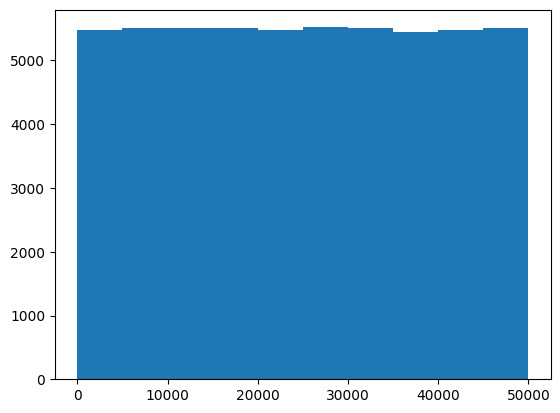

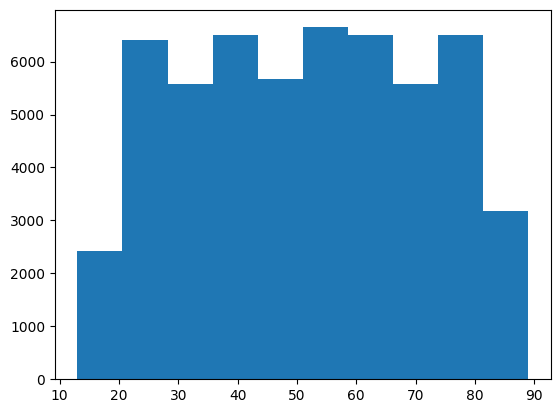

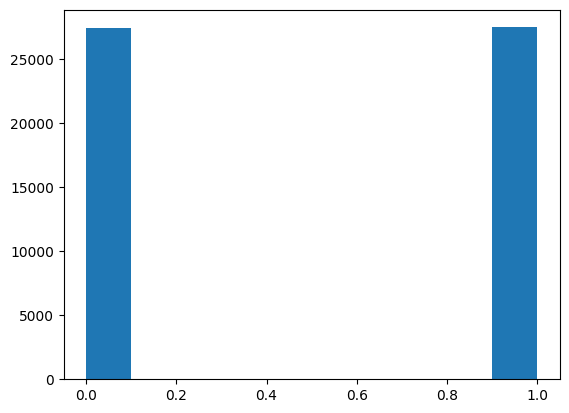

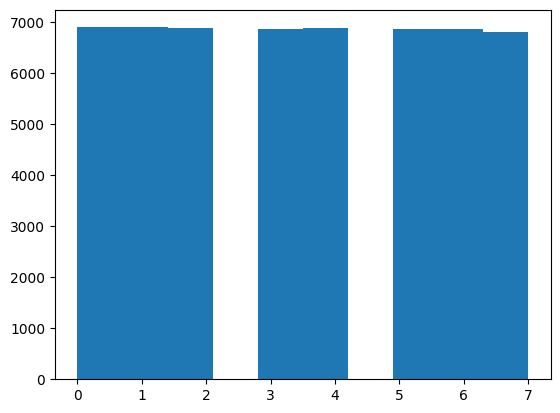

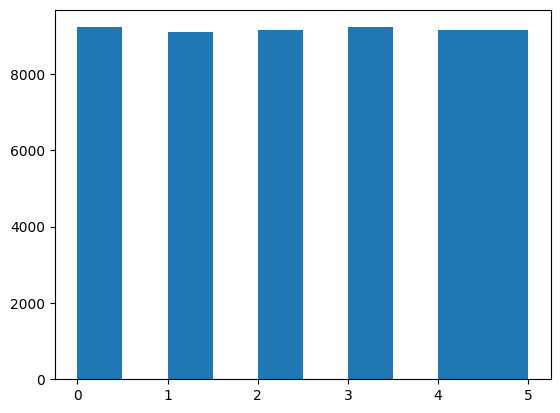

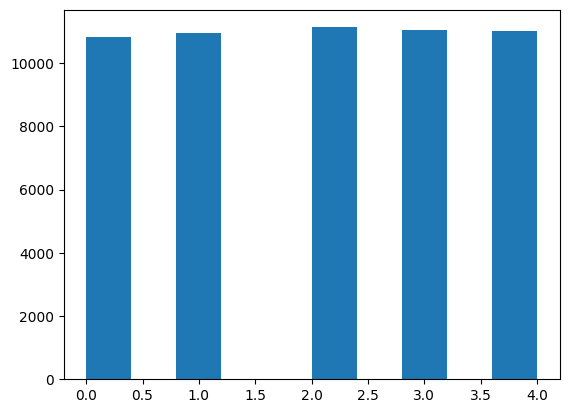

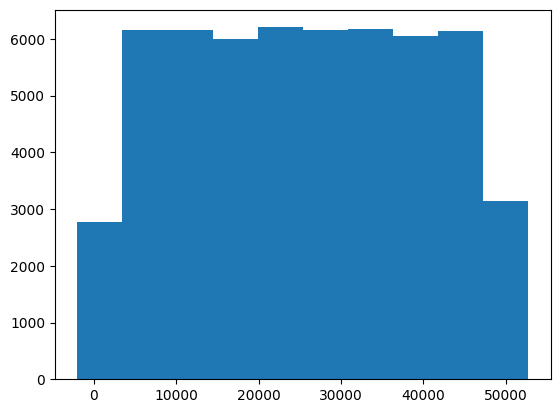

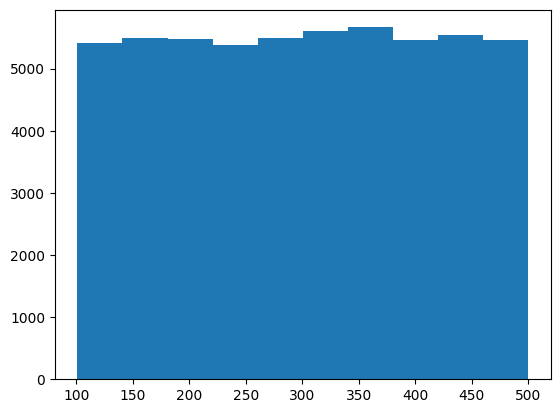

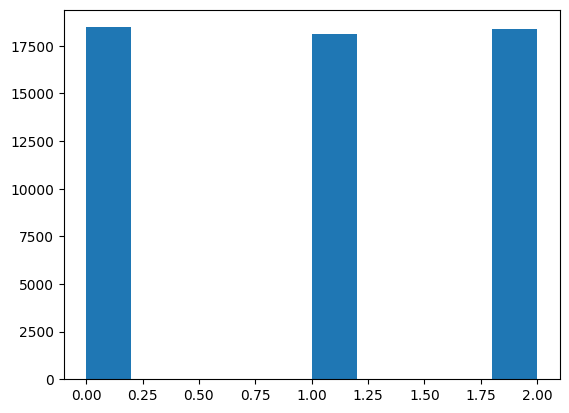

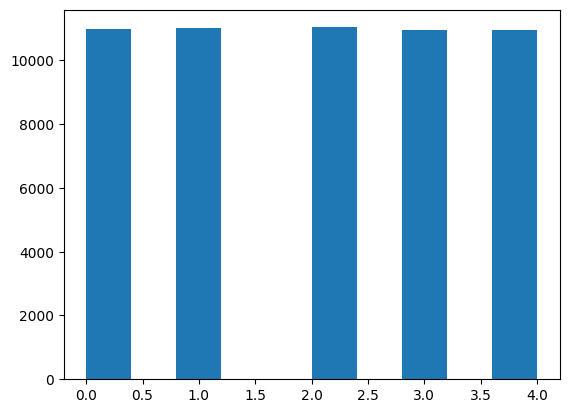

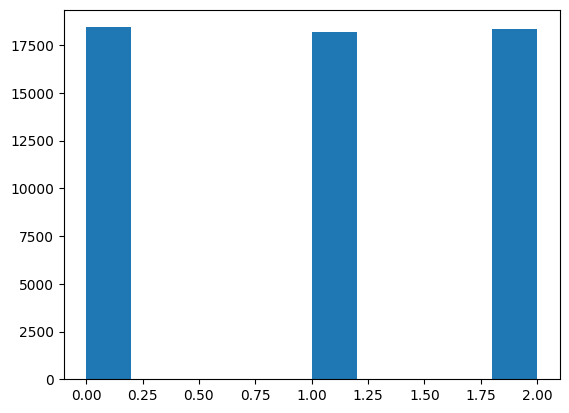

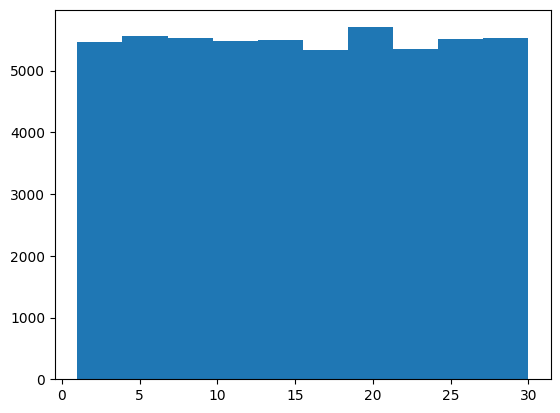

In [16]:
j=0
for i in DataFrame.columns:
        plt.figure(j)
        plt.hist(DataFrame[i],label=DataFrame[i])
        j=j+1


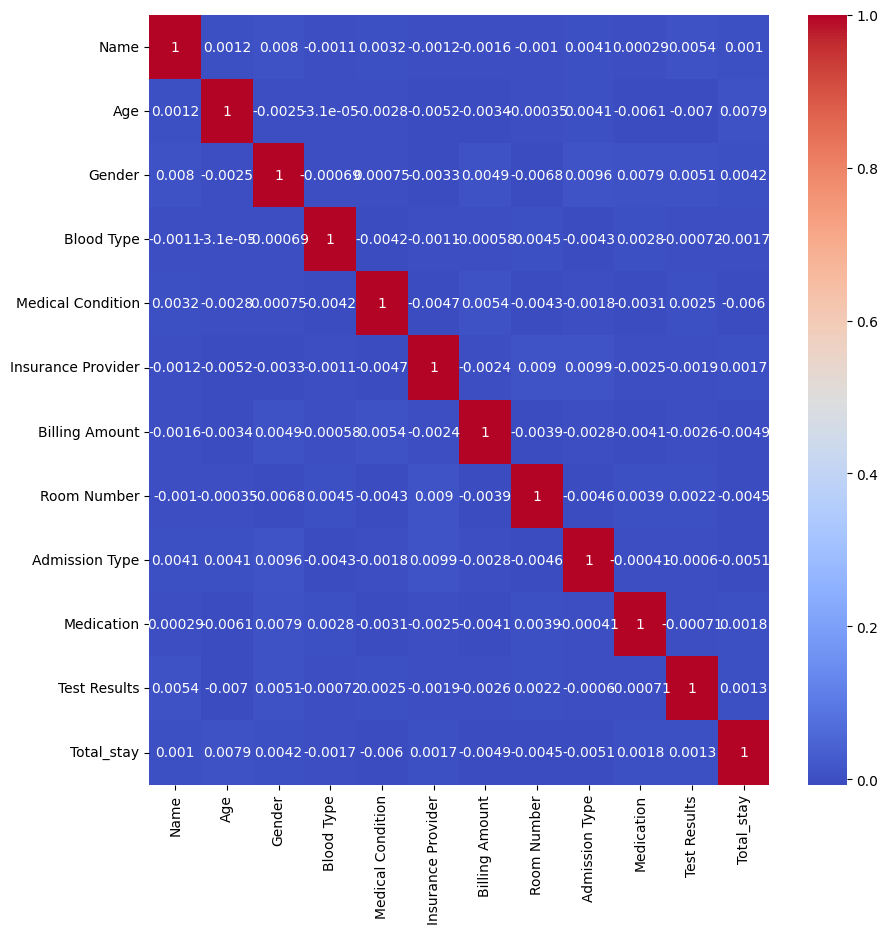

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(DataFrame.corr(),annot=True,cmap="coolwarm")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC


In [19]:
DataFrame.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type',
       'Medication', 'Test Results', 'Total_stay'],
      dtype='object')

In [21]:
x=DataFrame.drop(columns=["Test Results"])
y=DataFrame["Test Results"]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)
list1=[x_train,x_test,y_train,y_test]
for x in list1:
        print(x.shape)

(43972, 11)
(10994, 11)
(43972,)
(10994,)


In [24]:
models = {
    "RFC": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "criterion": ["gini", "entropy"]
        }
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf", "poly"]
        }
    },
    "HGBC": {
        "model": HistGradientBoostingClassifier(),
        "params": {
            "learning_rate": [0.01, 0.1, 0.5],
            "max_depth": [3, 5, 10],
            "min_samples_leaf": [10, 20, 30]
        }
    }
}

In [ ]:
best_models = {}

for name, info in models.items():
    grid_search = GridSearchCV(info["model"], info["params"], cv=5, n_jobs=-1, scoring="accuracy")
    grid_search.fit(x_train, y_train) 

    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    

Best parameters for RFC: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 200}


In [ ]:
for name, model in best_models.items():
    accuracy = model.score(x_test, y_test)  
    print(f"{name} model accuracy: {accuracy*100:.4f}")